In [3]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
cnx =sqlite3.connect('C:\\DataScience\\soccer\\database.sqlite')

df=pd.read_sql_query("Select * from Player_Attributes",cnx)
df.head()



,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


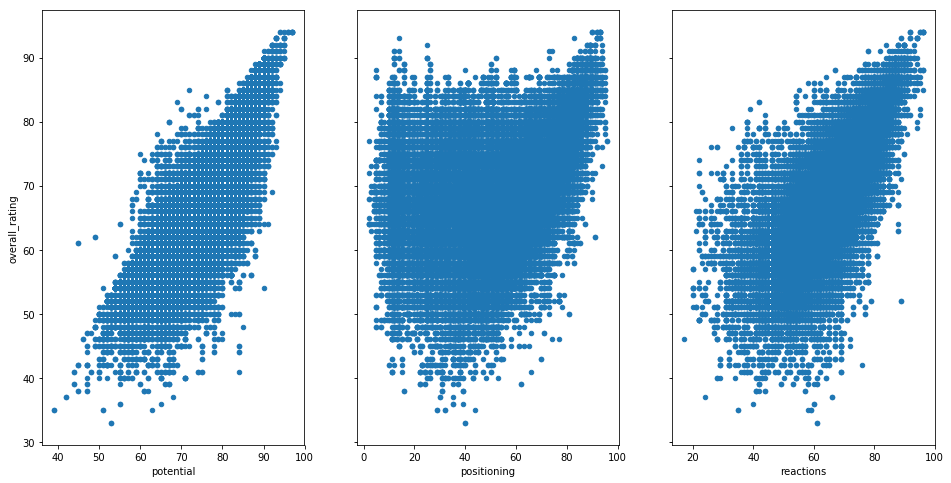

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,axs=plt.subplots(1,3,sharey=True)
df.plot(kind='scatter',x='potential',y='overall_rating',ax=axs[0],figsize=(16,8))
df.plot(kind='scatter',x='positioning',y='overall_rating',ax=axs[1],figsize=(16,8))
df.plot(kind='scatter',x='reactions',y='overall_rating',ax=axs[2],figsize=(16,8))



In [5]:
#df.defensive_work_rate.groupby("overall_rating")
df.groupby(['preferred_foot']).count()


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,attacking_work_rate,defensive_work_rate,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
preferred_foot,,,,,,,,,,,,,,,,,,,,,
left,44733,44733,44733,44733,44733,44733,44197,44733,44733,44733,...,44312,44733,44733,44733,44312,44733,44733,44733,44733,44733
right,138409,138409,138409,138409,138409,138409,136551,138409,138409,138409,...,136953,138409,138409,138409,136953,138409,138409,138409,138409,138409


In [6]:
#attackingworkrate_dummies = pd.get_dummies(df.attacking_work_rate, prefix='awr').iloc[:, 1:]
#attackingworkrate_dummies
#df = pd.concat([df, attackingworkrate_dummies], axis=1)
df.dropna(inplace=True)
preferred_foot_dummies = pd.get_dummies(df.preferred_foot, prefix='pf').iloc[:, 1:]
preferred_foot_dummies
df = pd.concat([df, preferred_foot_dummies], axis=1)

In [7]:
df.corr()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,pf_right
id,1.000000,0.003744,0.002048,-0.003738,0.000837,-0.020231,-0.008171,-0.011781,-0.006701,-0.006916,...,-0.011751,-0.010329,-0.012515,-0.011101,0.014251,0.010911,0.008758,0.014015,0.014671,0.021378
player_fifa_api_id,0.003744,1.000000,0.556557,-0.278703,-0.021252,-0.065631,-0.029836,-0.103500,-0.065311,-0.088726,...,-0.175255,-0.075568,-0.071128,-0.055218,-0.092945,-0.138844,-0.248222,-0.140925,-0.131531,-0.008626
player_api_id,0.002048,0.556557,1.000000,-0.328315,0.010588,-0.113365,-0.062312,-0.130282,-0.090237,-0.131262,...,-0.162481,-0.089772,-0.086706,-0.073595,-0.071825,-0.125345,-0.229704,-0.125525,-0.121947,-0.007240
overall_rating,-0.003738,-0.278703,-0.328315,1.000000,0.765435,0.357320,0.330079,0.313324,0.458243,0.361739,...,0.392715,0.132185,0.163986,0.128054,0.027675,0.006717,0.028799,0.008029,0.007804,-0.001417
potential,0.000837,-0.021252,0.010588,0.765435,1.000000,0.277284,0.287838,0.206063,0.382538,0.301678,...,0.315207,0.054094,0.082073,0.063284,-0.012283,0.005865,0.092299,0.004472,0.004936,-0.003513
crossing,-0.020231,-0.065631,-0.113365,0.357320,0.277284,1.000000,0.576896,0.368956,0.790323,0.637527,...,0.574208,0.234886,0.285018,0.274673,-0.604567,-0.595646,-0.356728,-0.597742,-0.601696,-0.174033
finishing,-0.008171,-0.029836,-0.062312,0.330079,0.287838,0.576896,1.000000,0.373459,0.580245,0.851482,...,0.726234,-0.285416,-0.230453,-0.262144,-0.479370,-0.465135,-0.292349,-0.470758,-0.473302,0.012004
heading_accuracy,-0.011781,-0.103500,-0.130282,0.313324,0.206063,0.368956,0.373459,1.000000,0.548435,0.391129,...,0.431291,0.460831,0.480054,0.441134,-0.665600,-0.649145,-0.402865,-0.648981,-0.652494,-0.004765
short_passing,-0.006701,-0.065311,-0.090237,0.458243,0.382538,0.790323,0.580245,0.548435,1.000000,0.639995,...,0.612511,0.349578,0.415427,0.380148,-0.694111,-0.689874,-0.422659,-0.691030,-0.693260,-0.073302
volleys,-0.006916,-0.088726,-0.131262,0.361739,0.301678,0.637527,0.851482,0.391129,0.639995,1.000000,...,0.713116,-0.170094,-0.108062,-0.127810,-0.508029,-0.486178,-0.279492,-0.490148,-0.492267,-0.011572


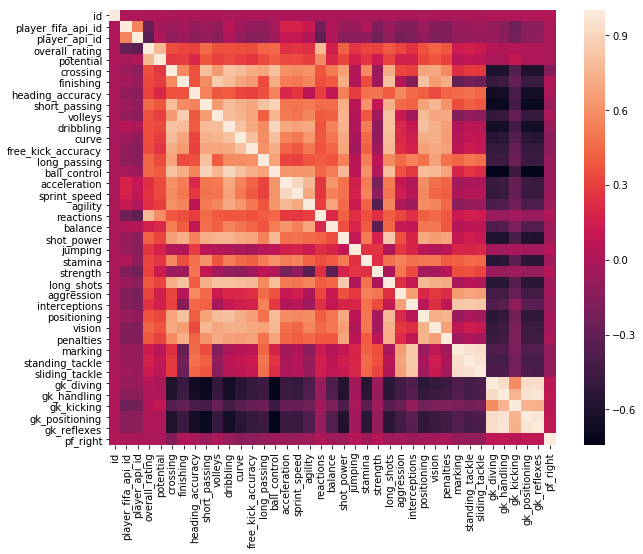

In [8]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

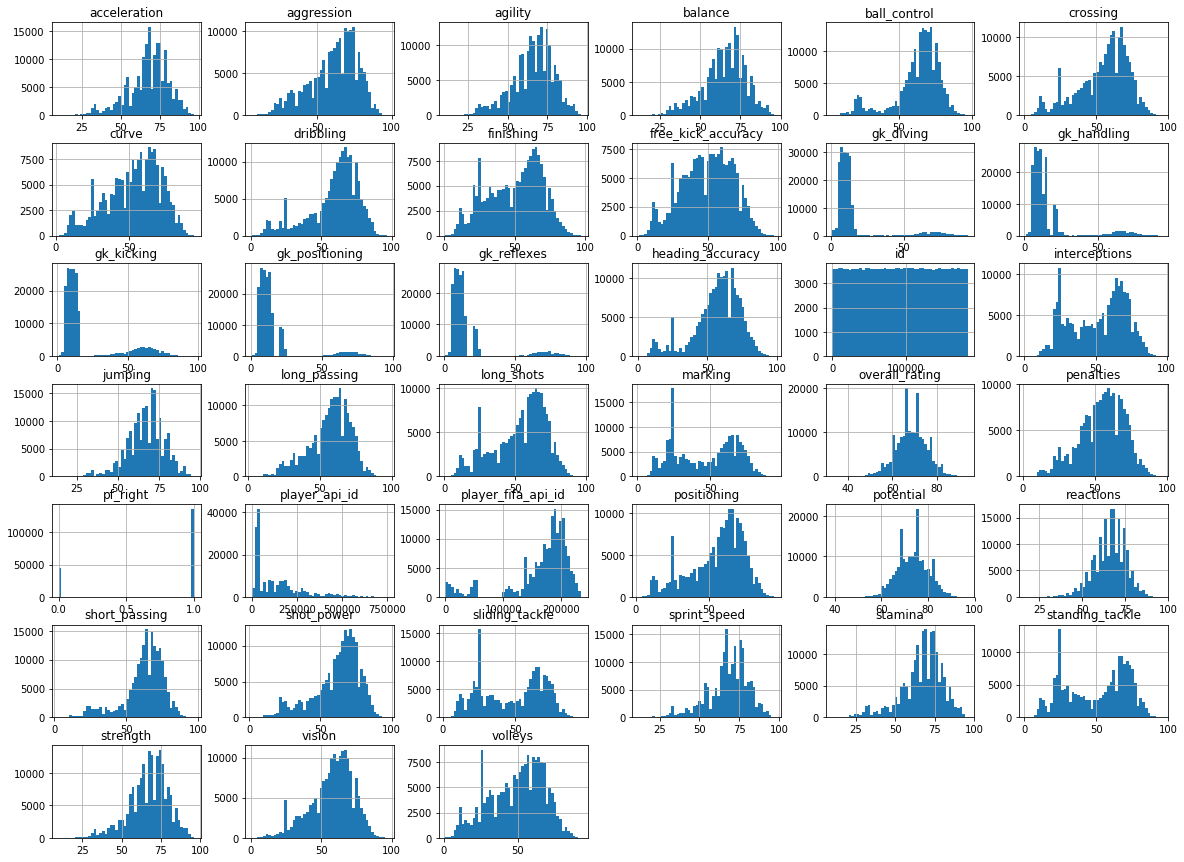

In [9]:
df.hist(bins=50, figsize=(20,15))
plt.show()

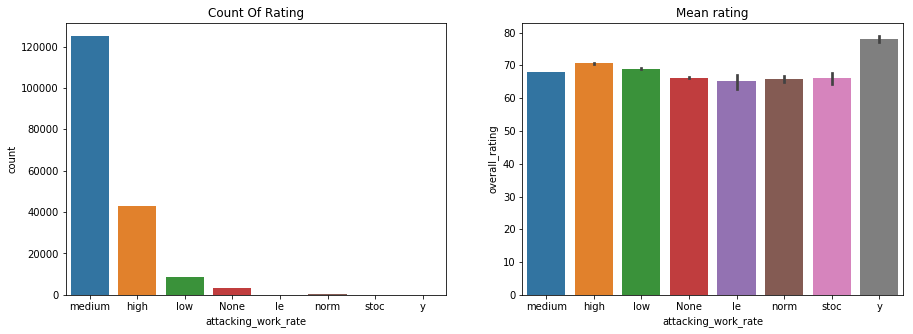

In [10]:
import numpy as np
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(df.attacking_work_rate)
plt.title('Count Of Rating')
plt.subplot(1,2,2)
sns.barplot(x='attacking_work_rate', y='overall_rating', data=df, estimator=np.mean)
plt.title('Mean rating')

In [14]:
X = df.drop('overall_rating',axis=1)
X = df.drop(['attacking_work_rate','defensive_work_rate','preferred_foot','date'],axis=1)
Y = df['overall_rating']
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state= 10)
print(train_x.shape)
print(train_y.shape)
lm=LinearRegression()
lm.fit(train_x,train_y)
yhat = lm.predict(test_x)
SS_Residual = sum((test_y-yhat)**2)
SS_Total = sum((test_y-np.mean(test_y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(test_y)-1)/(len(test_y)-test_x.shape[1]-1)
print(r_squared, adjusted_r_squared)

(144283, 39)
(144283,)
1.0 1.0


In [112]:
feature_cols=['potential','positioning','vision','reactions','shot_power','crossing','heading_accuracy','volleys']
#,'dribbling','curve','free_kick_accuracy','long_passing','ball_control','penalties','long_shots','aggression','standing_tackle'

X=df[feature_cols]
y=df.overall_rating
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X,y)
print(lm.intercept_)
print(lm.coef_)

5.178331203382442
[ 0.50344979 -0.02669684  0.01124272  0.35774329  0.04041283  0.00630486
  0.02305934 -0.01073821]


In [113]:
train_x,test_x,train_y,test_y= train_test_split(X,y,test_size=0.2,random_state=10)
lm.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [114]:
lm.predict(test_x)


array([71.19611599, 71.73683045, 65.14214489, ..., 66.39383249,
       69.21149564, 64.6292633 ])

In [115]:
import numpy as np
from sklearn import metrics

In [116]:
print("Mean squared error: %.2f" % np.mean((lm.predict(test_x) - test_y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lm.score(test_x, test_y))
from sklearn.metrics import mean_squared_error
from math import sqrt
predict_y=lm.predict(X)
# Squared Root Mean Square is a good measure of variation between Output predicted vs actual. It indicated the absolute fit of the model
#in respect to the actual.Lower the value it would be good
rms = sqrt(mean_squared_error(y, predict_y))
rms

Mean squared error: 12.17
Variance score: 0.76


3.4652964819967593

In [117]:
yhat = lm.predict(X)
SS_Residual = sum((y-yhat)**2)
SS_Total = sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.7568770962110064 0.7568663114194663


In [152]:
import statsmodels.formula.api as smf
sm = smf.ols(formula='overall_rating ~ potential+positioning+ vision + reactions + shot_power + crossing + heading_accuracy + volleys', data=df).fit()
sm.conf_int()
sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 7.037e+04
Date:                Mon, 12 Nov 2018   Prob (F-statistic):               0.00
Time:                        09:28:03   Log-Likelihood:            -4.8269e+05
No. Observations:              181265   AIC:                         9.654e+05
Df Residuals:                  181256   BIC:                         9.655e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.1288      0.093     55.157      0.000       4.947       5.311
potential            0.5049      0.002    327.084      0.000       0.502       0.508
positioning         -0.0261      0.001    -31.866      0.000      -0.028      -0.025
vision               0.0113      0.001     12.463      0.000       0.010       0.013
reactions            0.3567      0.001    304.440      0.000       0.354       0.359
shot_power           0.0402      0.001     45.045      0.000       0.038       0.042
crossing             0.0064      0.001      8.717      0.000       0.005       0.008
heading_accuracy     0.0231      0.001     38.964      0.000       0.022       0.024
volleys             -0.0111      0.001    -13.692      0.000      -0.013      -0.009
==============================================================================
Omnibus:                    18144.933   Durbin-Watson:                   0.390
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50517.828
Skew:                          -0.559   Prob(JB):                         0.00
Kurtosis:                       5.332   Cond. No.                     1.97e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""